In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io

# Misleading axis scale

In this example, we're going to demonstrate how the crop / scale of an axis can be misleading.

In [2]:
# Create the DataFrame containing our data to graph
sprint_times = pd.DataFrame(
    columns=['place', 'athlete', 'time'],
    data=
    [
        [1,'Usain Bolt',9.81],
        [2,'Justin Gatlin',9.89],
        [3,'Andre De Grasse',9.91],
        [4,'Yohan Blake',9.93],
        [5,'Akani Simbine',9.94],
        [6,'Ben Youssef Meite',9.96],
        [7,'Jimmy Vicaut',10.04],
        [8,'Trayvon Bromell',10.06],
        [9, 'Person Average', 14.0]
    ],
)
sprint_times['athlete_surname'] = sprint_times['athlete'].str.split(' ').str[-1] # Extract surname for graph
sprint_times = sprint_times.sort_values(by='time', ascending=False)
sprint_times.head()

,place,athlete,time,athlete_surname
8,9,Person Average,14.00,Average
7,8,Trayvon Bromell,10.06,Bromell
6,7,Jimmy Vicaut,10.04,Vicaut
5,6,Ben Youssef Meite,9.96,Meite
4,5,Akani Simbine,9.94,Simbine


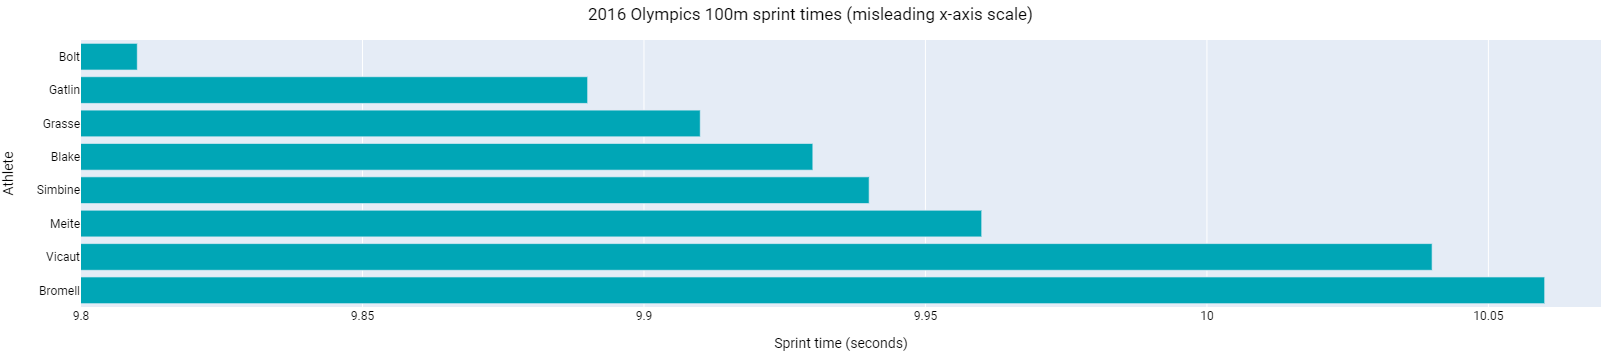

In [4]:
# Create the misleading plto
sprint_misleading = px.bar(
    sprint_times.loc[7:0], 
    y='athlete_surname', 
    x='time',
    orientation='h',
    title='2016 Olympics 100m sprint times (misleading x-axis scale)',
    color_discrete_sequence=['#00a6b6']*len(sprint_times.loc[7:0]),
    labels=dict(time="Sprint time (seconds)", athlete_surname="Athlete"),
)
sprint_misleading.update_xaxes(range=[9.8, 10.07]) # This makes the x-axis tiny
sprint_misleading.update_layout(width=700, height=300,
                 font_family="Roboto",
                 font_color="black",
                 margin=dict(l=50, r=20, t=40,b=40), title_x=0.5)
sprint_misleading.show()

plotly.io.write_image(sprint_misleading, "output/sprints_misleading_scale.svg", width=700, height=300, scale=1)

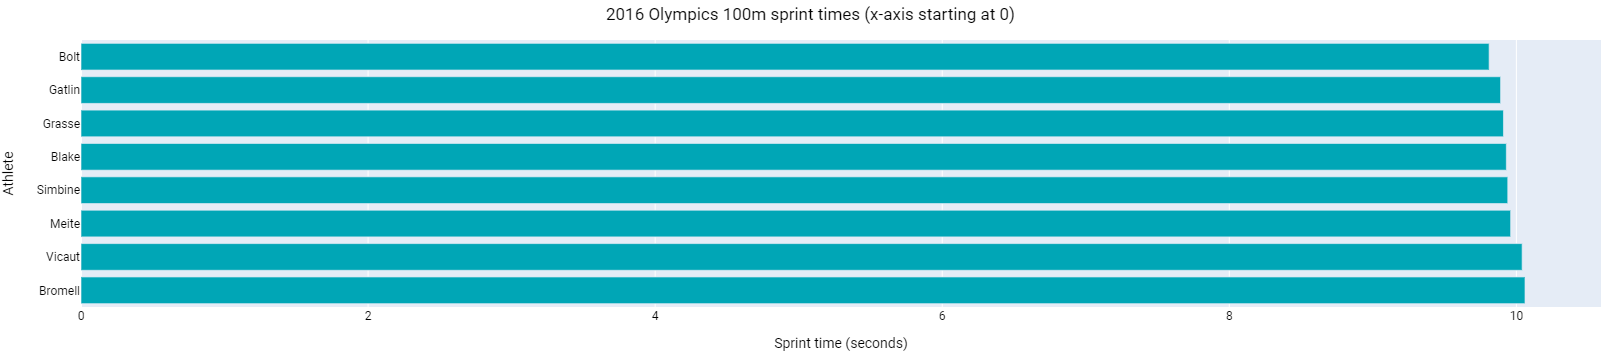

In [5]:
# Create a baselined graph, where x axis starts at 0 (default plotly behaviour)
sprint_baselined = px.bar(
    sprint_times.loc[7:0], 
    y='athlete_surname', 
    x='time',
    orientation='h',
    title='2016 Olympics 100m sprint times (x-axis starting at 0)',
    color_discrete_sequence=['#00a6b6']*len(sprint_times.loc[7:0]),
    labels=dict(time="Sprint time (seconds)", athlete_surname="Athlete"),
)
sprint_baselined.update_layout(width=700, height=300,
                 font_family="Roboto",
                 font_color="black",
                 margin=dict(l=50, r=20, t=40,b=40), title_x=0.5)

sprint_baselined.show()

plotly.io.write_image(sprint_baselined, "output/sprints_0_x_axis.svg", width=700, height=300, scale=1)

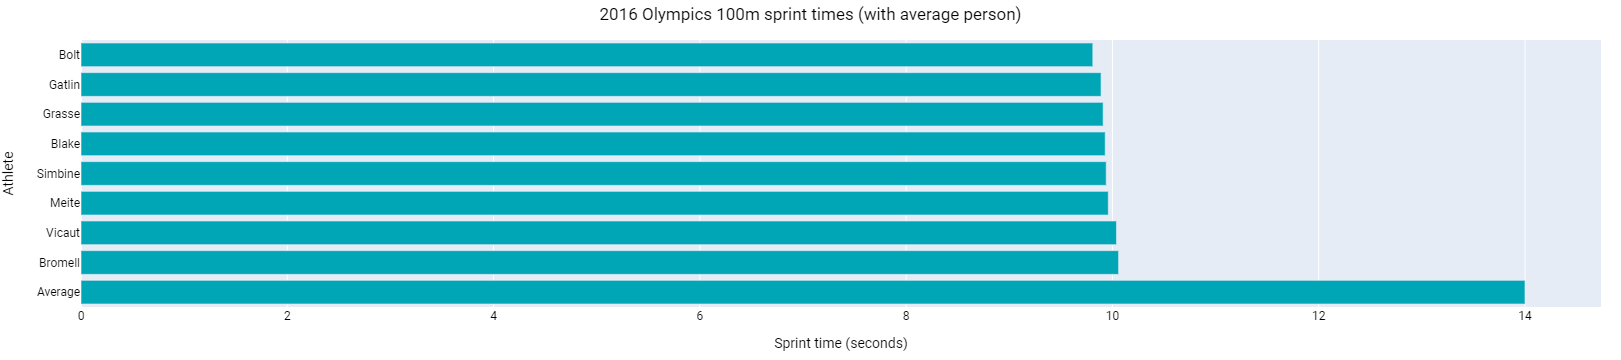

In [6]:
# Include average person in the graph
sprint_avg_person = px.bar(
    sprint_times, 
    y='athlete_surname', 
    x='time',
    orientation='h',
    title='2016 Olympics 100m sprint times (with average person)',
    color_discrete_sequence=['#00a6b6']*len(sprint_times),
    labels=dict(time="Sprint time (seconds)", athlete_surname="Athlete"),
)
sprint_avg_person.update_layout(width=700, height=300,
                 font_family="Roboto",
                 font_color="black",
                 margin=dict(l=50, r=20, t=40,b=40), title_x=0.5)
sprint_avg_person.show()

plotly.io.write_image(sprint_avg_person, "output/sprints_with_average_person.svg", width=700, height=300, scale=1)

# Heatmap showing perceptually uniform colours
In this example, we're going to demonstrate how the colours chosen for a heatmap can influence how you view it.

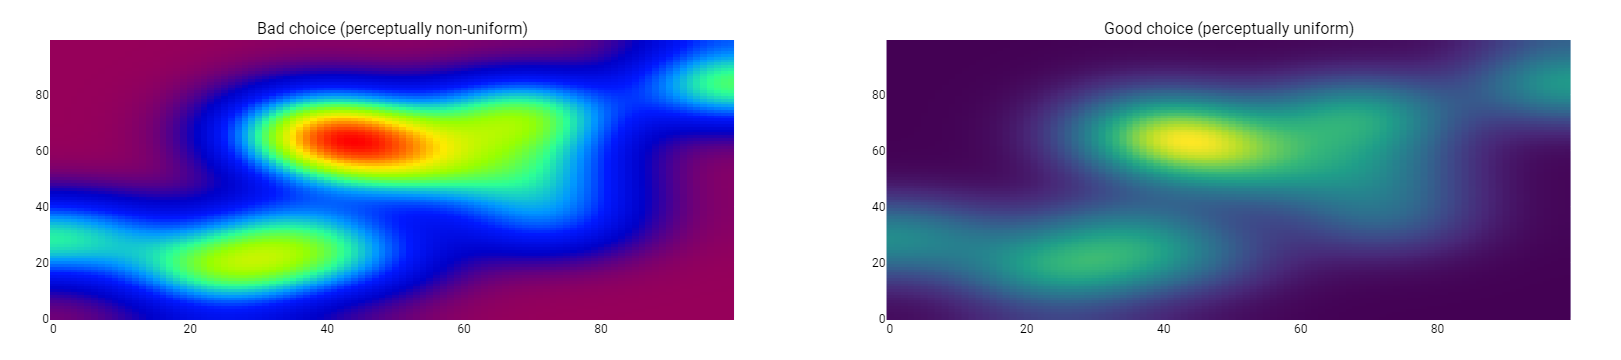

In [8]:
# Set our seed, and how many points we want to plot
np.random.seed(123)
num_points = 100

X, Y,  = np.mgrid[:num_points, :num_points] # Generate grid of (x,y) coords
val = np.zeros((num_points, num_points)) # We'll store our values at each (x,y) point in here
pts = (num_points * np.random.rand(2, 15)).astype(int) # Randomly pick a few points
val[tuple(indices for indices in pts)] = 1 # Set those points to 1 ("max value")
from scipy import ndimage
val = ndimage.gaussian_filter(val, 10) # Blur our values out to make blobs
val /= val.max() # Divide by max to normalise our data to 0-1

# Create our subplots
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Bad choice (perceptually non-uniform)", 
                                   "Good choice (perceptually uniform)")
                   )

# Add the rainbow-coloured heatmap into first column
fig.add_trace(go.Heatmap(
            x=X.flatten(), 
            y=Y.flatten(),
            z=val.flatten(),
            colorscale='rainbow'
        ),
        row=1, col=1
    )

# Add the viridis-coloured heatmap into second column
fig.add_trace(go.Heatmap(
            x=X.flatten(), 
            y=Y.flatten(),
            z=val.flatten(),
            colorscale='viridis'
        ),
        row=1, col=2
    )

# Make our graph look nice
fig.update_layout(height=350, width=700,
                 font_family="Roboto",
                 font_color="black",
                 margin=dict(l=50, r=50, t=40,b=40))
fig.update_traces(showscale=False)

# Show the graph below
fig.show()

# Write it out to a nice big file for inclusion in the blog
plotly.io.write_image(fig, "output/heatmap_side_by_side.svg", width=700, height=350, scale=1)

# Pesky pie charts

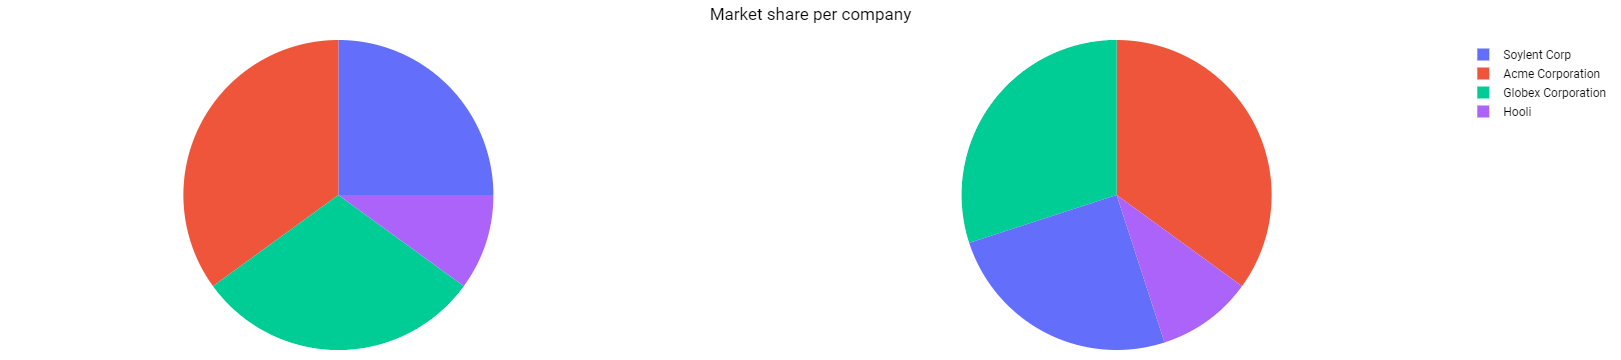

In [9]:
# Create two DataFrames, sorted and unsorted
# You could do this with one but this is just a bit easier / quicker
# for this specific demo
pie_data_unsorted = pd.DataFrame(
    columns=['company', 'market_share'],
    data=[
        ['Acme Corporation', 0.35],
        ['Globex Corporation', 0.3],
        ['Soylent Corp', 0.25],
        ['Hooli', 0.10]
    ])

pie_data_sorted = pd.DataFrame(
    columns=['company', 'market_share'],
    data=[
        ['Soylent Corp', 0.25],
        ['Acme Corporation', 0.35],
        ['Globex Corporation', 0.3],
        ['Hooli', 0.10]
    ])

# Create our sublots
pie_figures_unlabelled = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
                   
# Add the sorted graph (where it starts with 25% company first)
pie_fig_sorted = pie_figures_unlabelled.add_trace(
    go.Pie(values=pie_data_sorted['market_share'], 
           labels=pie_data_sorted['company'],
           sort=False), 
    row=1, col=1)
    
# Add the unsorted graph (where the 25% appears randomly in the mix)
pie_fig_unsorted = pie_figures_unlabelled.add_trace(
    go.Pie(values=pie_data_unsorted['market_share'], 
           labels=pie_data_unsorted['company'],
           sort=False), 
    row=1, col=2)

# Make it pretty
pie_figures_unlabelled.update_layout(height=350, width=700,
                 font_family="Roboto",
                 font_color="black",
                 margin=dict(l=20, r=50, t=40,b=10),
                 title_text='Market share per company', title_x=0.5)

# Remove the % labels within the slices for this example
pie_figures_unlabelled.update_traces(textinfo='none')

# Output the graph
pie_figures_unlabelled.show()
plotly.io.write_image(pie_figures_unlabelled, "output/pie_figures_unlabelled.svg", width=700, height=300, scale=1)

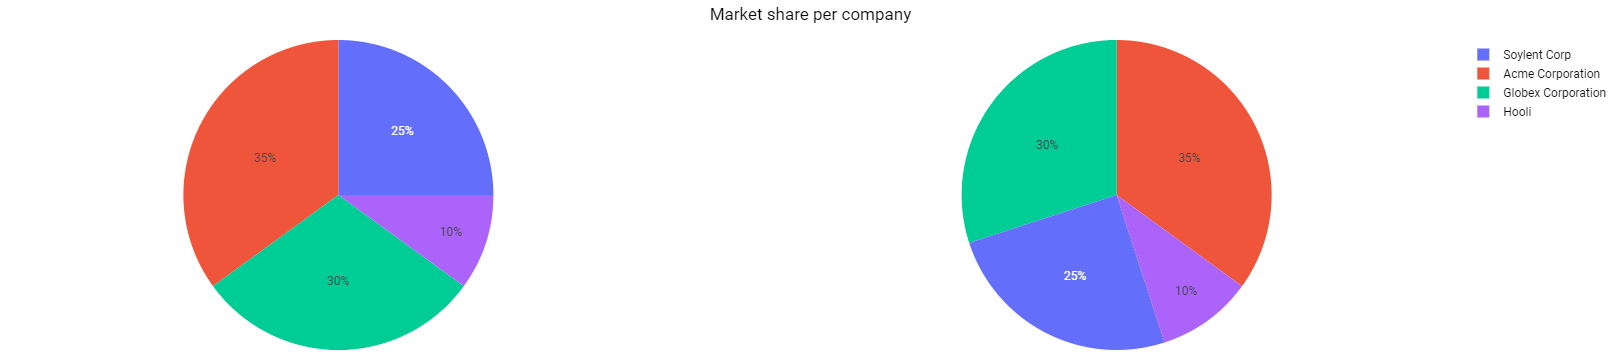

In [10]:
# Same graphs, but add the % labels back in now 
pie_figures_labelled = pie_figures_unlabelled
pie_figures_labelled.update_traces(textinfo='percent')

pie_figures_labelled.show()

plotly.io.write_image(pie_figures_labelled, "output/pie_figures_pct_labelled.svg", width=700, height=300, scale=1)

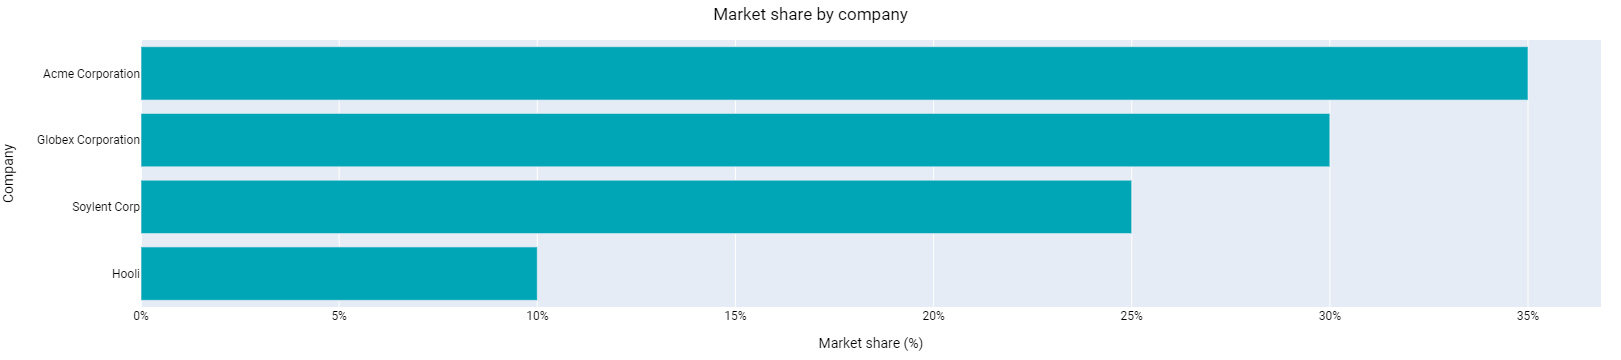

In [11]:
# Pie chart data, but on a bar chart this time

pie_data_pct = pie_data_sorted.copy()
pie_data_pct = pie_data_pct.sort_values(by='market_share')
pie_data_pct['market_share'] = 100 * pie_data_pct['market_share']
market_share_bar = px.bar(pie_data_pct.sort_values(by='market_share'), 
             x='market_share', 
             y='company',
             orientation='h',
             title='Market share by company',
             color_discrete_sequence=['#00a6b6']*len(pie_data_pct),
             labels=dict(company="Company", market_share="Market share (%)")                       
                          )
# Make it pretty
market_share_bar.update_layout(width=700, height=300,
                 font_family="Roboto",
                 font_color="black",
                 margin=dict(l=50, r=20, t=40,b=40), title_x=0.5)
market_share_bar.update_xaxes(ticksuffix='%')
market_share_bar.show()

plotly.io.write_image(market_share_bar, "output/pie_figure_alternative.svg", width=700, height=300, scale=1)

# Selective

In [13]:
# Create our example data
traffic_data = pd.DataFrame(
    columns=['month', 'traffic'],
    data=[
        [1,5000],
        [2,4826],
        [3,4559],
        [4,4613],
        [5,4433],
        [6,3965],
        [7,3996],
        [8,3882],
        [9,4048],
        [10,4302],
        [11,4433],
        [12,4567],
        [13,4413],
        [14,4260],
        [15,3821],
        [16,3823],
        [17,3646],
        [18,3407],
        [19,3197],
        [20,3080],
        [21,2936],
        [22,2759],
        [23,2617],
        [24,2374],
    ])

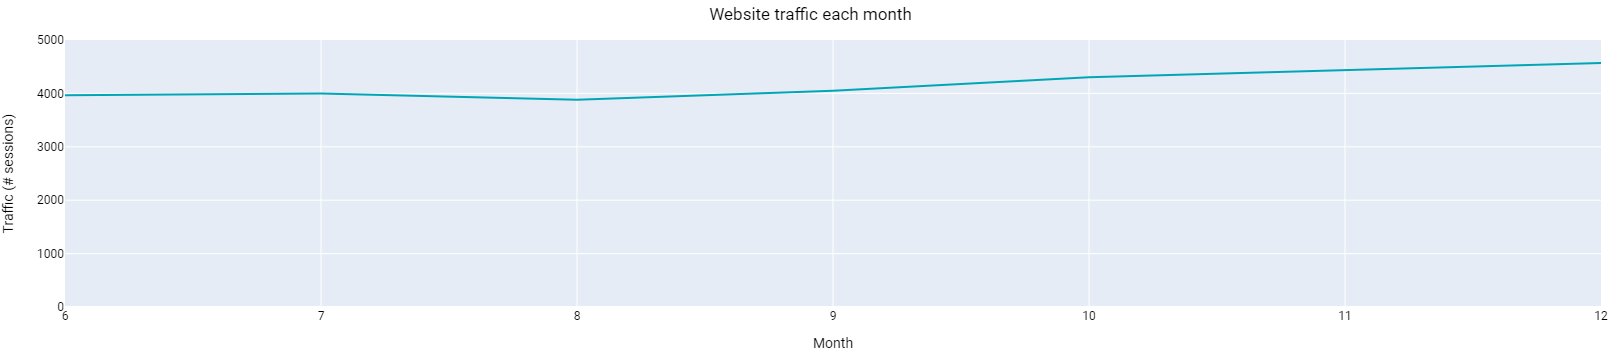

In [14]:
# Plot a small crop of the data to make it look like a positive trend
traffic_misleading = px.line(
    traffic_data.iloc[5:12], 
    x='month', 
    y='traffic',
    title='Website traffic each month',
    labels=dict(month="Month", traffic="Traffic (# sessions)"),
    color_discrete_sequence=['#00a6b6']*len(traffic_data.iloc[5:12])
)

# Make it pretty
traffic_misleading.update_layout(width=400, height=300,
                 font_family="Roboto",
                 font_color="black",
                 margin=dict(l=50, r=20, t=40,b=40), title_x=0.5)
traffic_misleading.update_yaxes(range=[0, 5000])
traffic_misleading.show()

plotly.io.write_image(traffic_misleading, "output/traffic_misleading.svg", width=400, height=400, scale=1)

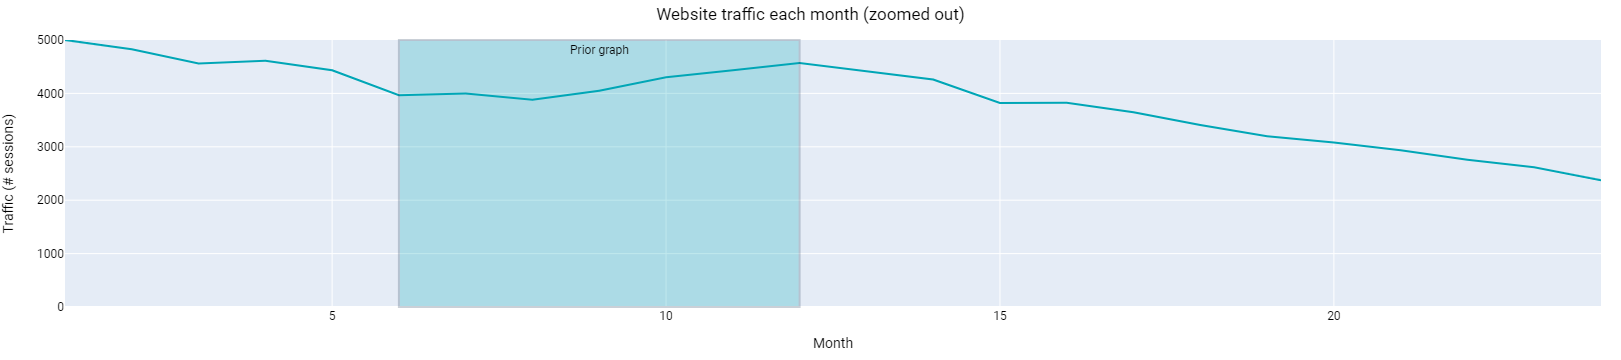

In [15]:
# Plot the same data but uncropped for full context
traffic_with_context = px.line(
    traffic_data, 
    x='month', 
    y='traffic',
    title='Website traffic each month (zoomed out)',
    labels=dict(month="Month", traffic="Traffic (# sessions)"),
    color_discrete_sequence=['#00a6b6']*len(traffic_data)
)
traffic_with_context.update_layout(width=700, height=300,
                 font_family="Roboto",
                 font_color="black",
                 margin=dict(l=50, r=20, t=40,b=40), title_x=0.5)

# Add an overlay showing where we cropped it last time
traffic_with_context.add_vrect(x0=6, x1=12, annotation_text="Prior graph", annotation_position="top",
                              fillcolor='#00a6b6', opacity=0.25)
traffic_with_context.update_yaxes(range=[0, 5000])
traffic_with_context.show()

plotly.io.write_image(traffic_with_context, "output/traffic_with_context.svg", width=700, height=300, scale=1)